# 4. Termdocument Matrix 

## 테크 크런치에서 10페이지의 기사 읽어오기 

In [25]:
import requests
import lxml.html
import numpy as np 

## 기사 목록 가져오는 함수 만들기

### 페이지 넘기기 

In [2]:
page = 2
url = 'https://techcrunch.com/startups/page/{number}'.format(number=page)

In [3]:
url

'https://techcrunch.com/startups/page/2'

 - python 3.6 부터는 다음 문법도 가능하다.
  - f'https://techcrunch.com/startups/page/{page}'

In [4]:
def get_tc_list(page):
    url = 'https://techcrunch.com/startups/page/{number}'.format(number=page)
    res = requests.get(url) # 기사 목록 가지고오기
    root = lxml.html.fromstring(res.text) # 제목 가지고오기
    titles = root.cssselect('h2 a') # 제목 가지고 오기
    for title in titles:
        yield  title.text

In [5]:
get_tc_list(1)

<generator object get_tc_list at 0x0000021FEB960EB8>

## 제네레이터(Generator)란?
 - 리스트를 생성(Generator)하는 함수.list(gen)나 for x in gen 형태로 쓴다. yield 하는 지점에서 한 원소씩 돌려줌. 

In [6]:
list(get_tc_list(1))

['Imagining five retro technologies as startup\xa0pitches',
 'AAA officially launches its car sharing startup Gig with a giant, sober dance party in\xa0Oakland',
 'Wynd’s air purifier has broad ambitions and a short\xa0reach',
 'Giant companies that won’t buy your\xa0startup',
 'City of Portland may subpoena Uber for details on Greyball\xa0program',
 'Yik Yak shuts down after Square paid $1 million for its\xa0engineers',
 'Exploring Virtualities, a Utah VR arcade and theater startup taking over a dying\xa0mall',
 'Deep Sentinel raises $7.4M to bring deep learning to home\xa0security',
 'Plug and Play launches a fintech accelerator in\xa0Paris',
 'Rollout.io’s Rox lets app developers deploy new features safely – just like the big guys\xa0do',
 'Equity podcast: Earnings clown car and the profitable-ish Dropbox with Hunter\xa0Walk',
 'Meet four of the startups in the Founder Spotlight at TC Disrupt\xa0NY',
 'Investors are betting 3DR can find life after Solo as a drone data\xa0platform',


 - "\xa"는 표시가 나온다 => 특수 문자, 16진수 \xa0 > 공백이다. 
  - jupyter notebook with R 에서 나오던 문제점이었다. 
  - nbsp -> Non Breakable Space 

In [7]:
def infinite():
    i = 0 
    while True:
        yield i
        i += 1

In [8]:
infinite() # 한번 실행하고 양보하고 부를때마다 수행하고 양보하는 형태다. list.append를 하게 되면 무한히 수행된다. 

<generator object infinite at 0x0000021FEB9F6A98>

In [9]:
infinite()

<generator object infinite at 0x0000021FEB960F68>

In [10]:
for x in infinite():
    if x > 5: # 5까지만 수행되고 그만된다. 
        break
    print(x)

0
1
2
3
4
5


## TQDM 
 - 진행막대(Progress Bar)를 보여주는 라이브러리 
 - pip install tqdm으로 설치.

In [12]:
import tqdm

## 기사 수집.

In [13]:
articles = []
for page in tqdm.tqdm_notebook(range(1,30)):
    articles = articles + list(get_tc_list(page))

In [14]:
len(articles)

580

In [17]:
articles[:5]

['Imagining five retro technologies as startup\xa0pitches',
 'AAA officially launches its car sharing startup Gig with a giant, sober dance party in\xa0Oakland',
 'Wynd’s air purifier has broad ambitions and a short\xa0reach',
 'Giant companies that won’t buy your\xa0startup',
 'City of Portland may subpoena Uber for details on Greyball\xa0program']

## TDM

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

 - 최대 Features수  : 단어가 최대 1000개 
 - stop_words : am, is, have 와 같은 단어를 제거 

In [19]:
cv = CountVectorizer(max_features=1000, stop_words='english',) 

In [20]:
tdm = cv.fit_transform(articles)

In [21]:
tdm

<580x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 3098 stored elements in Compressed Sparse Row format>

In [22]:
words = cv.get_feature_names()

In [23]:
words[:30]

['000',
 '10',
 '100m',
 '10m',
 '12',
 '15',
 '15m',
 '17',
 '170m',
 '18',
 '1m',
 '20',
 '2017',
 '21',
 '25',
 '25m',
 '2m',
 '300',
 '35',
 '3d',
 '400',
 '4m',
 '500',
 '500k',
 '52',
 '5m',
 '60m',
 '6m',
 '7m',
 '8m']

In [26]:
m = np.array([[1,2],[3,4]])
m

array([[1, 2],
       [3, 4]])

In [27]:
m.sum(axis=0)

array([4, 6])

In [28]:
m.sum(axis=1)

array([3, 7])

In [29]:
count_mat = tdm.sum(axis=0) # 열합계. 

위를 보면  000 은 2번,10도 2번, 100m도 2번 사용 되었다.

In [30]:
count_mat

matrix([[ 5,  2,  2,  7,  3,  4,  5,  2,  2,  2,  3,  2,  8,  2,  3,  3,  4,
          2,  2,  9,  2,  6,  6,  2,  2, 10,  4,  2,  3,  2,  4, 12,  5,  2,
          2, 22,  2,  4,  4,  2,  6,  3,  2,  4,  2, 20,  7,  2,  5,  2,  2,
          2,  2,  3,  2,  2,  3, 53,  5,  2,  2,  2,  2,  2,  3,  2,  3,  2,
          2,  2,  3,  5,  3,  2,  7,  3, 12,  2,  2,  2,  2,  2,  5,  2,  2,
          8,  2,  3,  2,  3,  2,  2,  2,  2,  5,  2,  2,  8,  3,  5,  6, 10,
          5,  3,  6,  2,  3,  4,  2,  2,  2,  2,  7,  7,  2,  2,  3,  6,  2,
          2,  2,  7,  2,  3,  2,  5,  2,  2,  3,  3,  8,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  6,  8,  2,  2,  3, 10, 20,  2,  2,  4,  2,  3,
          2,  5,  2,  3,  2,  2,  2,  2,  2,  2,  2,  2,  5,  5,  3,  3,  3,
         21,  4,  2,  7,  2,  2,  3,  2,  2,  2,  3,  7,  8,  6, 10,  2,  2,
          2,  3,  3,  2, 12,  4, 16,  2,  2,  3,  2,  2,  2,  2,  3,  2,  4,
          5,  5,  3,  2,  3,  4,  3,  2,  2,  2,  2,  2,  3,  8,  3,  2,  3,

 - Matrix가 대괄호가 2개다. 하나짜리로 변환 해줘야된다. 

In [31]:
import numpy as np 

In [32]:
count = np.squeeze(np.asarray(count_mat)) # 2개 짜리 메트릭스를 1개짜리로 변환 np.asarry() : Matrix to Array

In [33]:
count

array([ 5,  2,  2,  7,  3,  4,  5,  2,  2,  2,  3,  2,  8,  2,  3,  3,  4,
        2,  2,  9,  2,  6,  6,  2,  2, 10,  4,  2,  3,  2,  4, 12,  5,  2,
        2, 22,  2,  4,  4,  2,  6,  3,  2,  4,  2, 20,  7,  2,  5,  2,  2,
        2,  2,  3,  2,  2,  3, 53,  5,  2,  2,  2,  2,  2,  3,  2,  3,  2,
        2,  2,  3,  5,  3,  2,  7,  3, 12,  2,  2,  2,  2,  2,  5,  2,  2,
        8,  2,  3,  2,  3,  2,  2,  2,  2,  5,  2,  2,  8,  3,  5,  6, 10,
        5,  3,  6,  2,  3,  4,  2,  2,  2,  2,  7,  7,  2,  2,  3,  6,  2,
        2,  2,  7,  2,  3,  2,  5,  2,  2,  3,  3,  8,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  6,  8,  2,  2,  3, 10, 20,  2,  2,  4,  2,  3,
        2,  5,  2,  3,  2,  2,  2,  2,  2,  2,  2,  2,  5,  5,  3,  3,  3,
       21,  4,  2,  7,  2,  2,  3,  2,  2,  2,  3,  7,  8,  6, 10,  2,  2,
        2,  3,  3,  2, 12,  4, 16,  2,  2,  3,  2,  2,  2,  2,  3,  2,  4,
        5,  5,  3,  2,  3,  4,  3,  2,  2,  2,  2,  2,  3,  8,  3,  2,  3,
        3,  3,  5,  3,  2

In [34]:
word_count = list(zip(words,count)) #짝을 지어서 List로 변환. zip도 yield를 사용하고 있어서 list로 호출해줘야된다. 

In [35]:
word_count[:30]

[('000', 5),
 ('10', 2),
 ('100m', 2),
 ('10m', 7),
 ('12', 3),
 ('15', 4),
 ('15m', 5),
 ('17', 2),
 ('170m', 2),
 ('18', 2),
 ('1m', 3),
 ('20', 2),
 ('2017', 8),
 ('21', 2),
 ('25', 3),
 ('25m', 3),
 ('2m', 4),
 ('300', 2),
 ('35', 2),
 ('3d', 9),
 ('400', 2),
 ('4m', 6),
 ('500', 6),
 ('500k', 2),
 ('52', 2),
 ('5m', 10),
 ('60m', 4),
 ('6m', 2),
 ('7m', 3),
 ('8m', 2)]

In [36]:
import operator

In [37]:
sorted([3,6,7,1,2])

[1, 2, 3, 6, 7]

In [38]:
sorted([3,6,7,1,2], reverse=True)

[7, 6, 3, 2, 1]

In [39]:
# zipped.sort(key = lambda t: t[1])이렇게 해도될듯.

In [40]:
word_count2 = sorted(word_count, key=lambda t:t[1], reverse=True)

In [41]:
word_count = sorted(word_count, # 정렬
                   key=operator.itemgetter(1), # 1번째 (빈도)를 기준으로 
                    reverse=True
                   )

In [42]:
word_count[:30]

[('raises', 81),
 ('million', 59),
 ('startup', 55),
 ('app', 53),
 ('new', 52),
 ('startups', 40),
 ('launches', 31),
 ('platform', 23),
 ('acquires', 22),
 ('data', 21),
 ('make', 21),
 ('series', 21),
 ('ai', 20),
 ('company', 20),
 ('wants', 20),
 ('help', 19),
 ('founder', 18),
 ('service', 18),
 ('tech', 18),
 ('disrupt', 16),
 ('meetup', 15),
 ('funding', 13),
 ('mobile', 13),
 ('ny', 13),
 ('accelerator', 12),
 ('based', 12),
 ('digital', 12),
 ('lets', 12),
 ('meet', 12),
 ('fund', 11)]

In [43]:
word_count2[:30]

[('raises', 81),
 ('million', 59),
 ('startup', 55),
 ('app', 53),
 ('new', 52),
 ('startups', 40),
 ('launches', 31),
 ('platform', 23),
 ('acquires', 22),
 ('data', 21),
 ('make', 21),
 ('series', 21),
 ('ai', 20),
 ('company', 20),
 ('wants', 20),
 ('help', 19),
 ('founder', 18),
 ('service', 18),
 ('tech', 18),
 ('disrupt', 16),
 ('meetup', 15),
 ('funding', 13),
 ('mobile', 13),
 ('ny', 13),
 ('accelerator', 12),
 ('based', 12),
 ('digital', 12),
 ('lets', 12),
 ('meet', 12),
 ('fund', 11)]

## 워드클라우드 
 - <a href='http://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud'> Unofficial Windows Binaries for Python Extension Packages</a>에서 다운받은 다음, 명령창에서 아래명령을 실행. 
 - 해당 다운로드 된 폴더에서 pip install 파일명

In [44]:
%matplotlib inline

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [46]:
wc = WordCloud(background_color='White', width=400, height=300)
cloud = wc.generate_from_frequencies(dict(word_count))

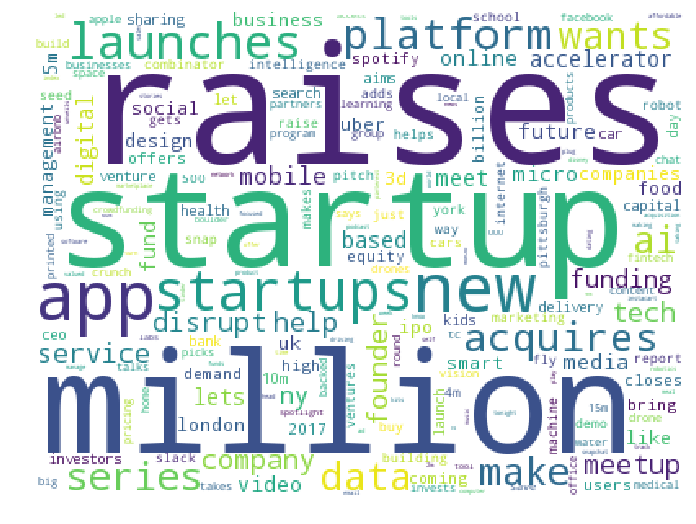

In [47]:
plt.figure(figsize=(12,9))
plt.imshow(cloud)
plt.axis('off')
plt.show()

## 상관 행렬 만들기 

In [48]:
tdm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<img src="1.PNG">

matrix([[1,1, 0, 0], <br>
        [0, 0, 1, 1]], dtype=int64) 
        
- 이런 형태로 만들어 진다. 

In [49]:
word_corr = np.corrcoef(tdm.todense(), rowvar=0)

In [50]:
word_corr

array([[ 1.        , -0.0046302 , -0.0046302 , ..., -0.00804763,
        -0.0046302 , -0.0046302 ],
       [-0.0046302 ,  1.        , -0.00346021, ..., -0.0060141 ,
        -0.00346021, -0.00346021],
       [-0.0046302 , -0.00346021,  1.        , ..., -0.0060141 ,
        -0.00346021, -0.00346021],
       ..., 
       [-0.00804763, -0.0060141 , -0.0060141 , ...,  1.        ,
        -0.0060141 , -0.0060141 ],
       [-0.0046302 , -0.00346021, -0.00346021, ..., -0.0060141 ,
         1.        , -0.00346021],
       [-0.0046302 , -0.00346021, -0.00346021, ..., -0.0060141 ,
        -0.00346021,  1.        ]])

In [51]:
edges = []
for i in range(len(words)):
    for j in range(i+1,len(words)):
        edges.append((words[i],words[j], word_corr[i,j]))

In [52]:
edges = sorted(edges, key=operator.itemgetter(2),reverse=True)

In [53]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

In [54]:
import networkx

In [55]:
G = networkx.Graph()

In [56]:
edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1,word2))

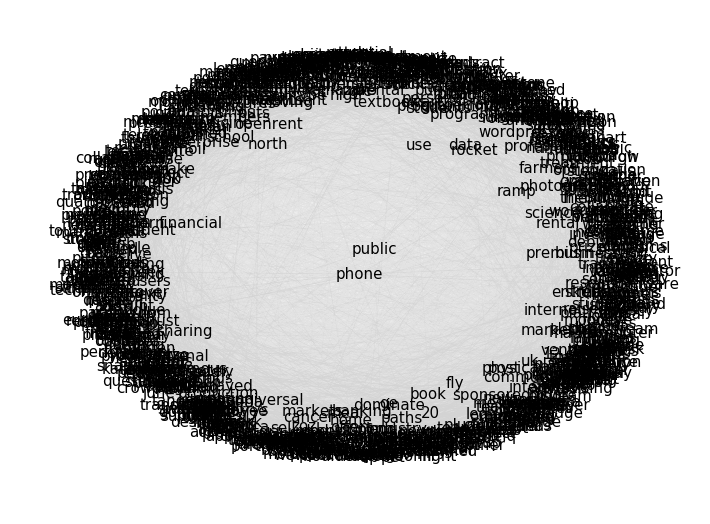

In [57]:
position = networkx.spring_layout(G, k=0.09,  iterations=100)
plt.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')
networkx.draw_networkx_labels(G, position, font_size=15)
plt.axis('off')
plt.show()